## Exploration of information gain and feature importance on a healthcare dataset

Example of using information gain (Gini impurity) to perform EDA on a tabular dataset: 
**Heart Disease Data Set - UCI Machine Learning Repository** (https://archive.ics.uci.edu/ml/datasets/heart+disease)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
np.random.seed(42)

In [6]:
names=['age','sex','cp','restbps','chol','fbs','restecg','thalac','exang','oldpeak','slope','ca','thal','outcome']
df=pd.read_csv('processed.cleveland.data.csv', header=None, names=names )
print(df.shape)
df.head(5)

(303, 14)


,age,sex,cp,restbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,outcome
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df[df.isna().any(axis=1)]
df=df.dropna(axis='rows')
df["outcome"][df["outcome"]>1]=1

In [8]:
df.head(5)

,age,sex,cp,restbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,outcome
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Brute force calculation of information gain for each feature

In [66]:
from information_gain import gini_calc
from information_gain import plot_gini_hist

In [2]:
y=df['outcome']
data=df['age']

threshold,ig = gini_calc(data,y)
plot_gini_hist(data,y,threshold,ig,'Hearth Disease',data.name)


NameError: name 'df' is not defined

In the case of **age** the optimal split is at 54.5 years. Information gain is ~0.05 (max 0.5) so we are far from a pure node. However it's easy to see how people with heart disease cluster at ages above the treshold.

### Compare with sklearn

Check if my implementation of Gini Purity is matched sklearn.

In [80]:
y=df['outcome']
data=df['age'].to_numpy().reshape(-1, 1)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(data, y)
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("information gain = " + str(feat_importance))

information gain = [0.04274969]


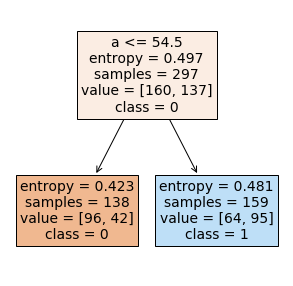

In [85]:
from sklearn import tree
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(clf, feature_names=df['age'].name, class_names=['0','1'],filled=True)

### Rank Feature Importance by information gain

Note that this would be the first step generarting a decision tree. Howver I find it useful to plot feature importance at this stage because information theory does not assume anything about the feature distribution

In [86]:
new_df = df.apply(lambda x: gini_calc(x,df['outcome']) if not x.name == 'outcome' else x) 
new_df=new_df[:-1]
new_df=new_df.to_frame()
new_df=pd.DataFrame(new_df[0].values.tolist(), index=new_df.index, columns=['threshold','ig'])
new_df=new_df.sort_values(by=['ig'],ascending=True)
new_df=new_df['ig']

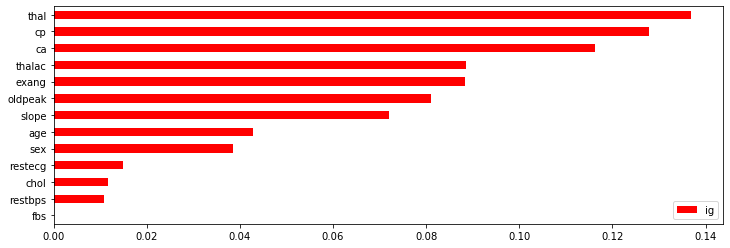

In [87]:
new_df.plot(kind='barh', color=['red'],rot=0,legend=True,figsize=(12,4))

Note how no feature is near 0.5 (which would correspond to a perfect separation between heart disease and no heart disease). Moreover:
1. To decide what feature are important one should inspect how much features are correlated
2. Check if there are outliers that bias the information gain score